In [1]:
# import libraries
import random, json, pandas, os, requests, datetime
import matplotlib.pyplot as plt

In [2]:
# declare constants
with open("city.list.json", "r", encoding = "utf-8") as inbox:
    CITIES = list(map(lambda x: x["id"], random.choices(json.load(inbox), k = 500)))
ball = os.path.dirname(os.path.dirname(os.path.realpath('__file__')))
ball = os.path.join(ball, "keyring.json")
with open(ball) as keyring:
    KEY = json.load(keyring)["weathermap"]
URL = "http://api.openweathermap.org/data/2.5/weather?APPID={}&units=imperial{}".format(KEY, "&id={}")

In [3]:
# declare functions
def pretty_picture(df, yaxis):
    """takes a dataframe and the string name of one of its columns. plots a plot with the x axis as latitude and the y axis as the given column"""
    # TODO: actually write this
    plt.figure(figsize = (22, 10))
    plt.scatter(df["Latitude"], df[yaxis], marker = "o")
    # REMEMBER TO SAVE THE PNG, not just show it!
    plt.xlabel("Latitude")
    plt.ylabel(yaxis)
    plt.grid(alpha = .25)
    ball = "{} vs. Latitude as of {}".format(yaxis, datetime.date.today())
    plt.title(ball)
    ball = ball.replace(" ", "_")
    ball = ball.replace(".", "")
    ball = ball + ".png"
    plt.savefig(ball)
    plt.show()

In [4]:
# collect data
result = []
for each in CITIES:
    ball = requests.get(URL.format(each)).json()
    with open("city_log.txt", "a", encoding = "utf-8") as outbox:
        outbox.write("requesting data for a city\n\tID number: {}\n\tname: {}\n\trequest URL: {}\n".format(each, ball["name"], URL.format(each)))
    result.append({
        "Latitude": ball["coord"]["lat"],
        "Temperature (F)": ball["main"]["temp"],
        # TODO: make sure temp is in F - done
        "Humidity (%)": ball["main"]["humidity"],
        "Cloudiness (%)": ball["clouds"]["all"],
        "Wind Speed (mph)": ball["wind"]["speed"],
    })
result = pandas.DataFrame(result)
with open("citydata.csv", "w", encoding = "utf-8") as outbox:
    result.to_csv(outbox)

,Cloudiness (%),Humidity (%),Latitude,Temperature (F),Wind Speed (mph)
0,0,10,33.06,62.13,5.82
1,80,95,51.52,39.32,10.65
2,20,52,39.23,19.40,2.24
3,75,100,53.40,37.80,8.05
4,0,86,44.72,27.50,6.93
5,75,76,44.24,50.00,8.05
6,20,53,55.57,21.20,11.18
7,75,88,-4.01,77.00,4.70
8,36,80,-33.12,80.41,0.92
9,90,63,43.17,27.48,6.40


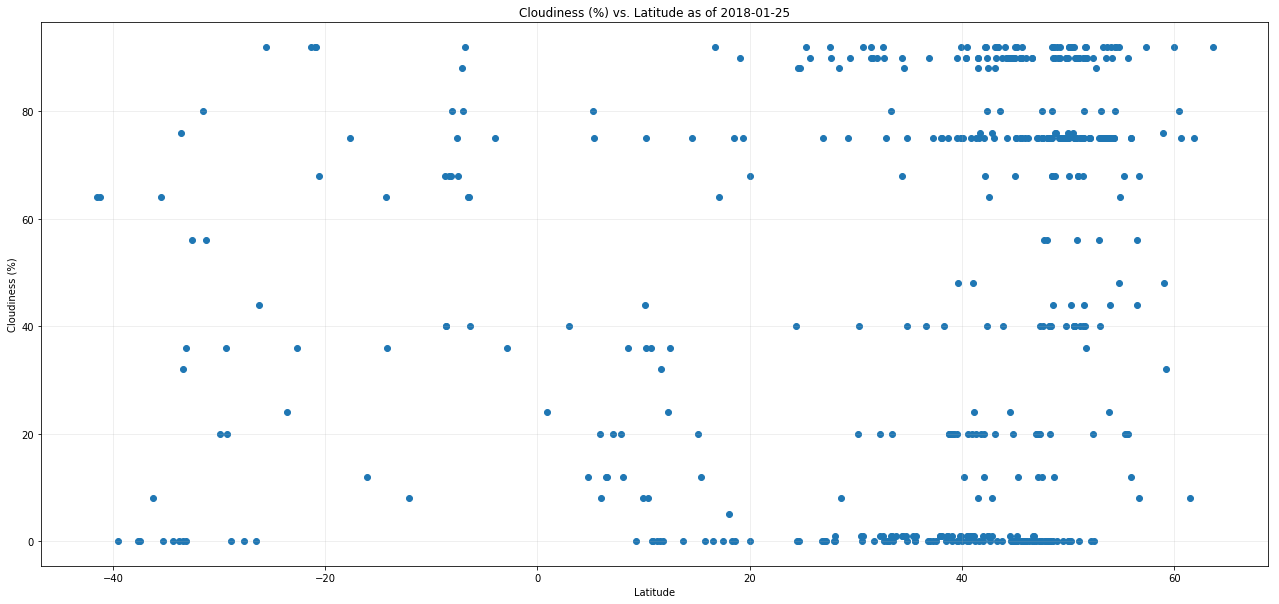

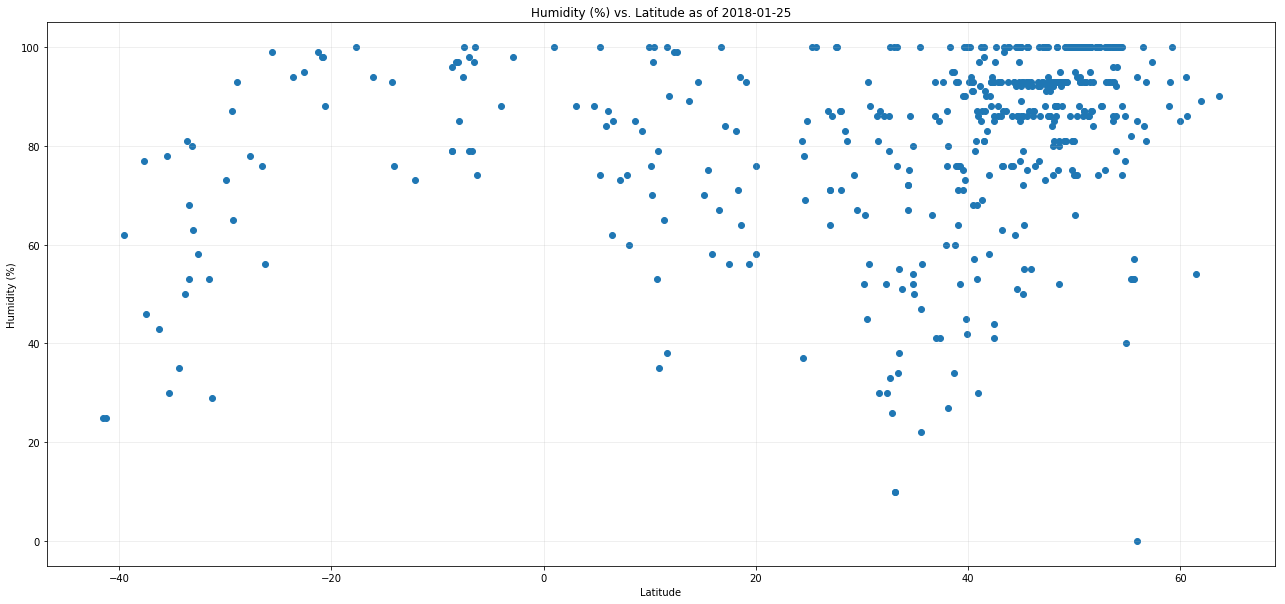

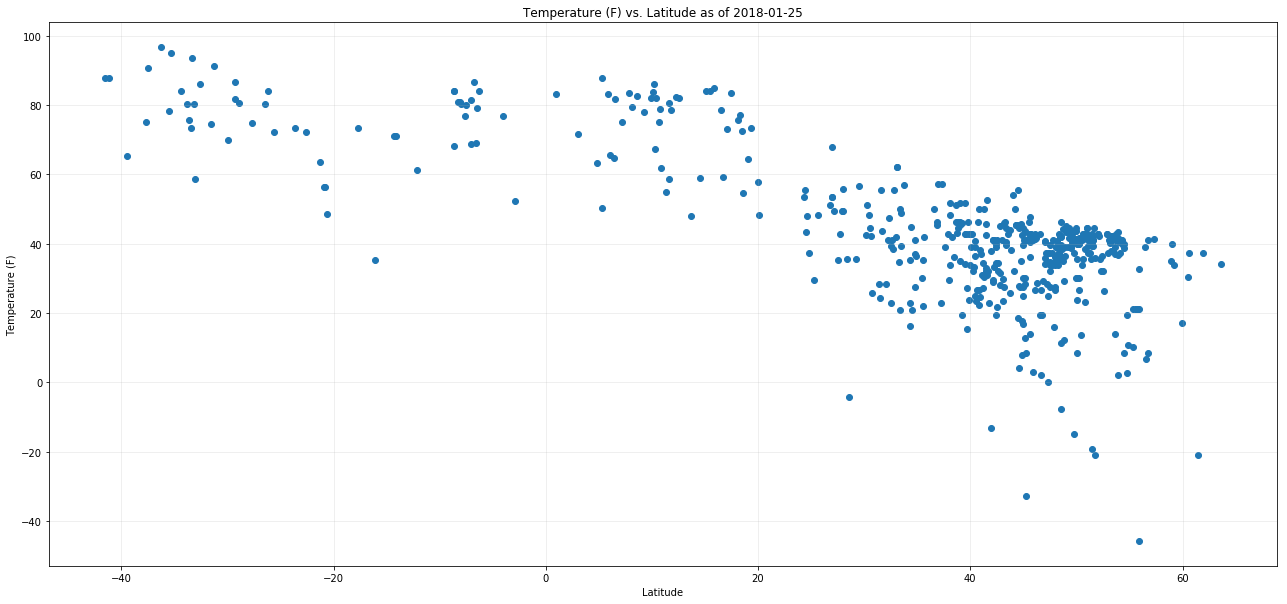

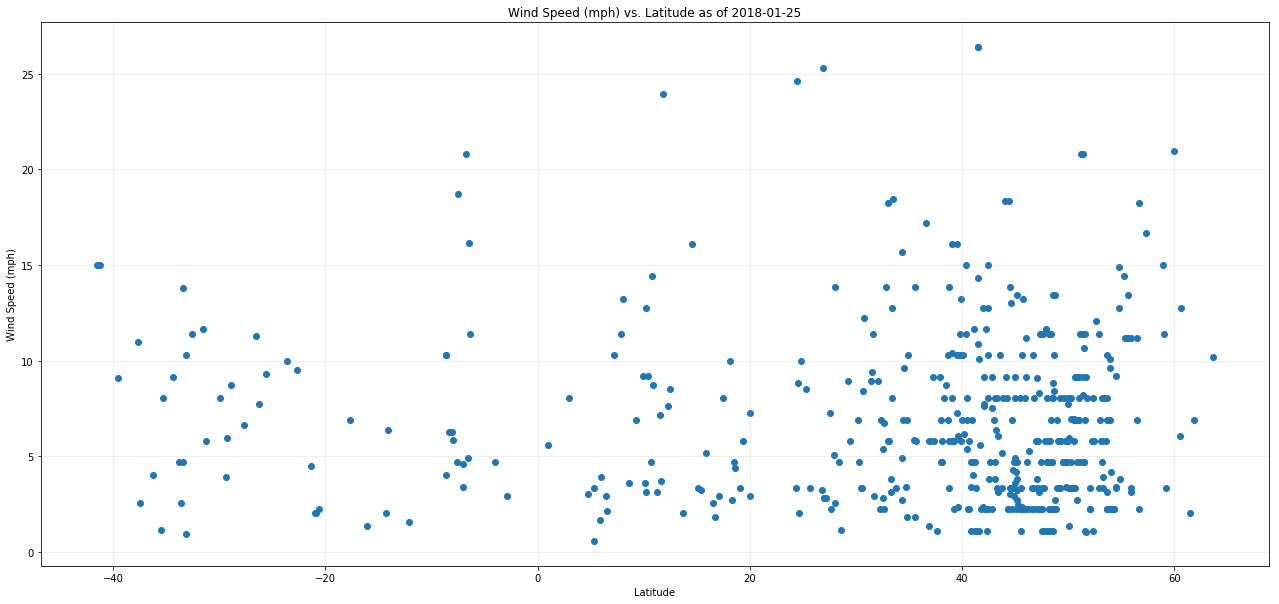

In [5]:
for each in ["Cloudiness (%)", "Humidity (%)", "Temperature (F)", "Wind Speed (mph)"]:
    pretty_picture(result, each)